In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df = df[["Annual Income (k$)","Spending Score (1-100)"]]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

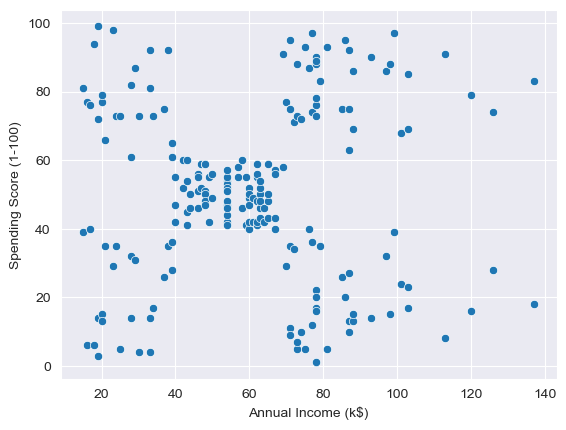

In [7]:
sns.scatterplot(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [9]:
from sklearn.cluster import KMeans

In [13]:
km = KMeans()
y = km.fit_predict(x)

In [14]:
km.cluster_centers_

array([[-1.35185213, -1.19089759],
       [ 0.66703804,  1.23036618],
       [ 0.12948524, -0.15473165],
       [-0.50061327,  0.04054696],
       [ 0.7489536 , -1.45651437],
       [ 1.81769762,  1.26275949],
       [-1.35366972,  1.15873115],
       [ 1.87564575, -1.09476801]])

In [16]:
x = pd.DataFrame(x)
x["cluster"] = y
x

,0,1,cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,6
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,6
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,5
196,2.497807,-0.861839,7
197,2.497807,0.923953,5
198,2.917671,-1.250054,7


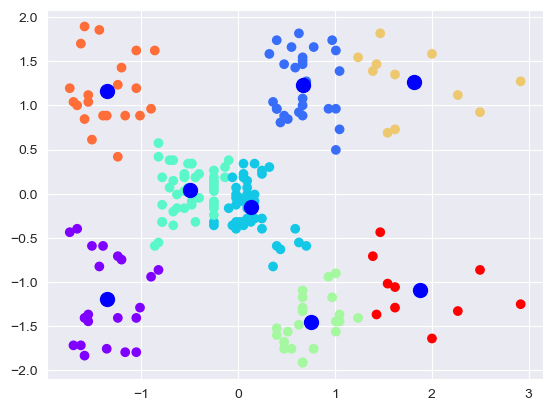

In [25]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = x["cluster"], cmap = "rainbow")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = "blue", s = 100)

In [29]:
x1 = x.iloc[:,:-1]

In [30]:
#Elow graph

In [36]:
wcss = []

for i in range(1,25):
    km = KMeans(n_clusters = i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)

In [37]:
wcss

[399.99999999999994,
 269.29934286898697,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.86475569922557,
 37.20770501574228,
 32.40665967645661,
 29.211524910730297,
 25.998313577489935,
 23.448498408830954,
 21.486273197962063,
 19.400412289800215,
 18.123447444136232,
 15.965856362716229,
 15.033468767315846,
 13.616231453594025,
 13.034477013333678,
 12.383611055032581,
 11.36790372656399,
 10.501843078456904,
 10.13573443755834,
 9.337948282359683]

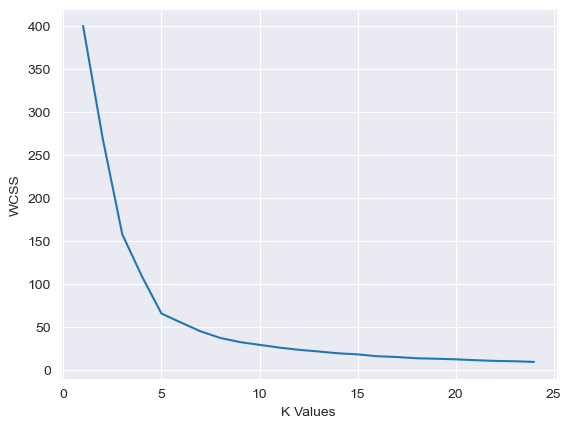

In [38]:
plt.plot(range(1,25), wcss)
plt.xlabel("K Values")
plt.ylabel("WCSS");

In [39]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(x1)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [40]:
x1["cluster"] = y

x1

,0,1,cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,2
197,2.497807,0.923953,1
198,2.917671,-1.250054,2


In [41]:
km.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

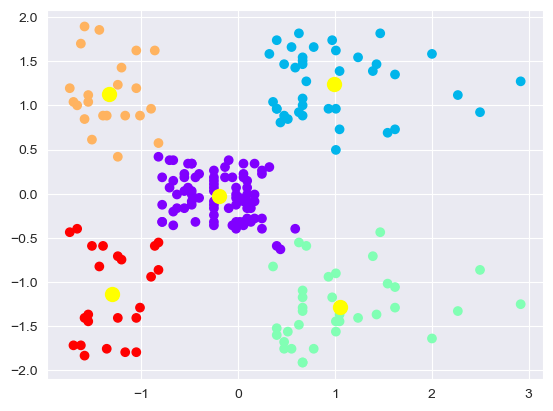

In [44]:
plt.scatter(x1.iloc[:,0], x.iloc[:,1], c = x1["cluster"], cmap = "rainbow")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = "yellow", s = 100)

In [45]:
df["Y"] = y
df

,Annual Income (k$),Spending Score (1-100),Y
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [46]:
df.groupby("Y").agg("mean")

,Annual Income (k$),Spending Score (1-100)
Y,,
0,55.296296,49.518519
1,86.538462,82.128205
2,88.200000,17.114286
3,25.727273,79.363636
4,26.304348,20.913043


In [47]:
df[df["Y"]==1]

,Annual Income (k$),Spending Score (1-100),Y
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [49]:
df

,Annual Income (k$),Spending Score (1-100),Y
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [50]:
X = df.iloc[:,:-1]
y = df["Y"]

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [52]:
lg = LogisticRegression()
lg.fit(xtrain, ytrain)
ypred = lg.predict(xtest)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9
           3       1.00      0.80      0.89         5
           4       1.00      0.75      0.86         8

    accuracy                           0.93        40
   macro avg       0.96      0.91      0.93        40
weighted avg       0.94      0.93      0.92        40

